# Homework 5
## 1.

First, since the dataset is really large, we try to read just some of the rows to see which are the columns and how the information are stored. In this way we will know which columns are necessary to take for the ceration of the Citation Graph and Collaboration Graph.

In [5]:
import ijson
import pandas as pd

#Initializing an empty list to store data
data_short = []

#Opening the JSON file for reading in binary mode
with open(r"C:\Users\sofyc\OneDrive\Desktop\Homework5_adm\archive\dblp.v12.json", "rb") as file:
    #Using ijson library to parse JSON items from the file
    objects = ijson.items(file, "item")

    #Iterating over the items in the JSON file
    for i, obj in enumerate(objects):
        #Break the loop after processing 1000 items (change as needed)
        if i == 1000:
           break

        #Appending the current JSON item to the data list
        data_short.append(obj)

df_short = pd.DataFrame(data_short)

Now we visualize the riducted dataset.

In [7]:
df_short

id                                            authors  \
0      1091  [{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...   
1      1388     [{'name': 'Pranava K. Jha', 'id': 2718958994}]   
2      1674  [{'name': 'G. Beale', 'org': 'Archaeological C...   
3      1688  [{'name': 'Altaf Hossain', 'org': 'Department ...   
4      5411  [{'name': 'Rafael Álvarez', 'id': 2125293936},...   
..      ...                                                ...   
995  875054  [{'name': 'Maazen Alsabaan', 'org': 'Universit...   
996  875060  [{'name': 'Frank Wolter', 'org': 'Institut für...   
997  876431  [{'name': 'Apostolos P. Fournaris', 'org': 'Un...   
998  876610  [{'name': 'Hans H. K. Andersen', 'id': 2132304...   
999  877544  [{'name': 'David Barina', 'org': 'Faculty of I...   

                                                 title  year  n_citation  \
0    Preliminary Design of a Network Protocol Learn...  2013           1   
1    Further Results on Independence in Direct-Prod...  2000           1   
2    A methodology for the physically accurate visu...  2011           1   
3    Comparison of GARCH, Neural Network and Suppor...  2009           6   
4    COMPARING GNG3D AND QUADRIC ERROR METRICS METH...  2009           0   
..                                                 ...   ...         ...   
995  Geocast Routing in Vehicular Networks for Redu...  2011           7   
996  Spatial reasoning in RCC-8 with Boolean region...  2000          53   
997  Trust Management Through Hardware Means: Desig...  2011           7   
998                 Evaluation of an e-commerce Agent.  2002           0   
999    Minimum Memory Vectorisation of Wavelet Lifting  2013           4   

    page_start page_end    doc_type                     publisher volume  \
0           89       93  Conference  Springer, Berlin, Heidelberg          
1                           Journal                                   56   
2          137      144  Conference      Eurographics Association          
3          597      602  Conference  Springer, Berlin, Heidelberg          
4           99      102  Conference                                        
..         ...      ...         ...                           ...    ...   
995         26       40  Conference  Springer, Berlin, Heidelberg          
996        244      248  Conference                     IOS Press          
997         31       45  Conference           Springer, Dordrecht          
998         64       70  Conference                                        
999         91      101  Conference                Springer, Cham          

    issue                           doi  \
0          10.1007/978-3-642-39476-8_19   
1                                         
2           10.2312/VAST/VAST11/137-144   
3          10.1007/978-3-642-11164-8_97   
4                                         
..    ...                           ...   
995         10.1007/978-3-642-23447-7_4   
996                                       
997         10.1007/978-94-007-1488-5_3   
998                                       
999         10.1007/978-3-319-02895-8_9   

                                            references  \
0                             [2005687710, 2018037215]   
1                                                  NaN   
2    [1535888970, 1992876689, 1993710814, 203565334...   
3                 [1560724230, 1986968751, 2156909104]   
4                                                  NaN   
..                                                 ...   
995  [2101963262, 2136758263, 2144113407, 216268564...   
996  [852874, 1525985171, 1551609000, 1568262744, 1...   
997  [118467740, 1730333074, 1881737672, 1969042806...   
998                                                NaN   
999                           [2106145405, 2124994383]   

                                      indexed_abstract  \
0    {'IndexLength': 58, 'InvertedIndex': {'tool.':...   
1                                                  NaN   
2 

As we can see we have 16 columns and we are interested in particular in: "id", "authors", "n_citation" and "references". Since the file is really large, we take just some of the columns and we also add the following columns to have complete information: "title", "doc_type" and "doi".

In [1]:
import ijson
import pandas as pd
import numpy as np
import time

start = time.process_time()

#Path of the file
json_file_path = r"C:\Users\sofyc\OneDrive\Desktop\Homework5_adm\archive\dblp.v12.json"

#Initializing the DATA variable
DATA = [] 
with open(json_file_path, "rb") as file:
    objects = ijson.items(file, "item")
    for i, element in enumerate(objects):
        data = {}

        #Extracting 'id' from the element
        data['id'] = element['id']

        #Extracting 'authors' from the element
        authors = element.get('authors', {})
        data['authors'] = authors


        #Extracting 'title' from the element
        data['title'] = element['title']

        #Extracting 'year' from the element or set to NaN if not present
        year = element.get('year')
        data['year'] = year if year else np.nan

        #Extracting 'n_citation' from the element or set to 0 if not present
        n_citation = element.get('n_citation')
        data['n_citation'] = element['n_citation'] if n_citation else 0

        #Extracting 'doc_type' from the element or set to NaN if not present
        doc_type = element.get('doc_type')
        data['doc_type']= element['doc_type'] if doc_type else np.nan

        #Extracting 'references' from the element, join them with ';' if present, or set to NaN if not present
        references = element.get('references')
        data['references'] = ';'.join([str(int(r)) for r in references]) if references else np.nan

        #Extracting 'doi' from the element, format it as a URL if present, or set to NaN if not present
        doi = element.get('doi')
        if doi:
            data['doi']= f"https://doi.org/{element['doi']}"
        else:
            data['doi']= np.nan
        
        #Appending the extracted data to the DATA list
        DATA.append(data)

        if i%48000 ==0:
            print(f"{i}:{round((time.process_time() - start),2)}s ",end="")

#Creating the dataframe
df = pd.DataFrame(DATA)



0:0.0s 48000:2.56s 96000:4.34s 144000:6.53s 192000:8.77s 240000:11.39s 288000:16.3s 336000:20.84s 384000:25.39s 432000:29.89s 480000:34.31s 528000:39.09s 576000:43.27s 624000:47.27s 672000:51.52s 720000:56.06s 768000:60.84s 816000:66.05s 864000:70.23s 912000:75.08s 960000:79.98s 1008000:84.11s 1056000:89.31s 1104000:93.56s 1152000:98.0s 1200000:104.14s 1248000:109.03s 1296000:113.73s 1344000:118.0s 1392000:122.41s 1440000:127.06s 1488000:131.42s 1536000:136.02s 1584000:140.53s 1632000:145.89s 1680000:151.3s 1728000:156.16s 1776000:161.06s 1824000:166.02s 1872000:171.11s 1920000:174.41s 1968000:179.75s 2016000:185.02s 2064000:188.3s 2112000:193.86s 2160000:199.84s 2208000:205.38s 2256000:208.61s 2304000:214.34s 2352000:217.58s 2400000:222.5s 2448000:228.73s 2496000:232.19s 2544000:238.62s 2592000:241.95s 2640000:247.94s 2688000:254.27s 2736000:257.84s 2784000:264.72s 2832000:267.97s 2880000:274.62s 2928000:281.23s 2976000:284.48s 3024000:290.17s 3072000:296.09s 3120000:299.48s 3168000:3

Now we visualize the dataset.

In [2]:
df

id                                            authors  \
0             1091  [{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...   
1             1388     [{'name': 'Pranava K. Jha', 'id': 2718958994}]   
2             1674  [{'name': 'G. Beale', 'org': 'Archaeological C...   
3             1688  [{'name': 'Altaf Hossain', 'org': 'Department ...   
4             5411  [{'name': 'Rafael Álvarez', 'id': 2125293936},...   
...            ...                                                ...   
4894076   99905544  [{'name': 'S. Nandagopalan', 'org': 'Dept. of ...   
4894077   99884553  [{'name': 'Koen Cornelis Hubertus Blom', 'org'...   
4894078  999847014  [{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...   
4894079    9990887  [{'name': 'Rajesh Natarajan', 'org': 'Indian I...   
4894080   99956490  [{'name': 'Egon Börger', 'org': 'Institut für ...   

                                                     title    year  \
0        Preliminary Design of a Network Protocol Learn...  2013.0   
1        Further Results on Independence in Direct-Prod...  2000.0   
2        A methodology for the physically accurate visu...  2011.0   
3        Comparison of GARCH, Neural Network and Suppor...  2009.0   
4        COMPARING GNG3D AND QUADRIC ERROR METRICS METH...  2009.0   
...                                                    ...     ...   
4894076  A Naïve-Bayesian methodology to classify echo ...  2010.0   
4894077   Blind Equalization for underwater communications  2014.0   
4894078           Technical Implementation and Feasibility  2015.0   
4894079                    Knowledge Patterns in Databases  2011.0   
4894080  Bemerkung zu Gurevich's Arbeit über das Entsch...  1978.0   

         n_citation    doc_type  \
0                 1  Conference   
1                 1     Journal   
2                 1  Conference   
3                 6  Conference   
4                 0  Conference   
...             ...         ...   
4894076           2  Conference   
4894077           0         NaN   
4894078           1         NaN   
4894079           0         NaN   
4894080           0     Journal   

                                                references  \
0                                    2005687710;2018037215   
1                                                      NaN   
2        1535888970;1992876689;1993710814;2035653341;20...   
3                         1560724230;1986968751;2156909104   
4                                                      NaN   
...                                                    ...   
4894076  1562217771;1625504505;2015022770;2108751703;21...   
4894077                                                NaN   
4894078  1940933138;1975620021;1978183200;2097595927;21...   
4894079                                                NaN   
4894080                   2032457623;2094542439;2114368612   

                                                     doi  
0           https://doi.org/10.1007/978-3-642-39476-8_19  
1                                                    NaN  
2            https://doi.org/10.2312/VAST/VAST11/137-144  
3           https://doi.org/10.1007/978-3-642-11164-8_97  
4                                                    NaN  
...                                                  ...  
4894076     https://doi.org/10.1007/978-3-642-24788-0_15  
4894077          https://doi.org/10.3990/1.9789036536806  
4894078      https://doi.org/10.1007/978-3-319-14439-9_9  
4894079  https://doi.org/10.4018/978-1-59904-931-1.ch081  
4894080               https://doi.org/10.1007/BF02011872  

[4894081 rows x 8 columns]

We can see that there are a lot of NaNs, so we delete the NaNs from the columns 'id', 'authors', 'references'.

In [35]:
#Eliminating NaNs values
df = df.dropna(subset=['id'])
df = df.dropna(subset=['authors'])
df = df.dropna(subset=['references'])

#Eliminating the duplicates from the column 'id'
df = df.drop_duplicates(subset=['id'])

In [36]:
#Visualizing the new dataset
df

id                                            authors  \
0             1091  [{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...   
2             1674  [{'name': 'G. Beale', 'org': 'Archaeological C...   
3             1688  [{'name': 'Altaf Hossain', 'org': 'Department ...   
6             6522  [{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...   
8             8373  [{'name': 'Phan Cong Vinh', 'org': 'Department...   
...            ...                                                ...   
4894073  999545449  [{'name': 'Zaiwu Gong', 'org': 'School of Econ...   
4894075  998513720            [{'name': 'Jian Yu', 'id': 2517449035}]   
4894076   99905544  [{'name': 'S. Nandagopalan', 'org': 'Dept. of ...   
4894078  999847014  [{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...   
4894080   99956490  [{'name': 'Egon Börger', 'org': 'Institut für ...   

                                                     title    year  \
0        Preliminary Design of a Network Protocol Learn...  2013.0   
2        A methodology for the physically accurate visu...  2011.0   
3        Comparison of GARCH, Neural Network and Suppor...  2009.0   
6        Improved Secret Image Sharing Method By Encodi...  2011.0   
8        Formal agent-oriented ubiquitous computing: a ...  2012.0   
...                                                    ...     ...   
4894073  Consensus modeling with nonlinear utility and ...  2015.0   
4894075       Communication: Words and Conceptual Systems.  2015.0   
4894076  A Naïve-Bayesian methodology to classify echo ...  2010.0   
4894078           Technical Implementation and Feasibility  2015.0   
4894080  Bemerkung zu Gurevich's Arbeit über das Entsch...  1978.0   

         n_citation    doc_type  \
0                 1  Conference   
2                 1  Conference   
3                 6  Conference   
6                 0  Conference   
8                 0  Conference   
...             ...         ...   
4894073          18     Journal   
4894075           0  Repository   
4894076           2  Conference   
4894078           1         NaN   
4894080           0     Journal   

                                                references  \
0                                    2005687710;2018037215   
2        1535888970;1992876689;1993710814;2035653341;20...   
3                         1560724230;1986968751;2156909104   
6              2007942710;2040446335;2042901705;2138296484   
8        141500162;1977736041;2057072261;2495388083;261...   
...                                                    ...   
4894073  97170299;1848568749;1969696992;1972529917;1973...   
4894075                   2124479173;2242142378;2912565176   
4894076  1562217771;1625504505;2015022770;2108751703;21...   
4894078  1940933138;1975620021;1978183200;2097595927;21...   
4894080                   2032457623;2094542439;2114368612   

                                                  doi  
0        https://doi.org/10.1007/978-3-642-39476-8_19  
2         https://doi.org/10.2312/VAST/VAST11/137-144  
3        https://doi.org/10.1007/978-3-642-11164-8_97  
6        https://doi.org/10.1007/978-1-4471-2155-8_42  
8        https://doi.org/10.1007/978-3-642-28490-8_52  
...                                               ...  
4894073  https://doi.org/10.1016/j.knosys.2015.07.031  
4894075                                           NaN  
4894076  https://doi.org/10.1007/978-3-642-24788-0_15  
4894078   https://doi.org/10.1007/978-3-319-14439-9_9  
4894080            https://doi.org/10.1007/BF02011872  

[3777107 rows x 8 columns]

Now we transform to csv format ---> IT'S A PART TO ELIMINATE 

In [6]:
df.to_csv('df_csv.csv', index=False)

In [1]:
import pandas as pd

#Read the CSV file into a DataFrame
df = pd.read_csv('df_csv.csv')

In [2]:
df

id                                            authors  \
0             1091  [{'name': 'Makoto Satoh', 'org': 'Shinshu Univ...   
1             1674  [{'name': 'G. Beale', 'org': 'Archaeological C...   
2             1688  [{'name': 'Altaf Hossain', 'org': 'Department ...   
3             6522  [{'name': 'Güzin Ulutas', 'org': 'Karadeniz Te...   
4             8373  [{'name': 'Phan Cong Vinh', 'org': 'Department...   
...            ...                                                ...   
3777102  999545449  [{'name': 'Zaiwu Gong', 'org': 'School of Econ...   
3777103  998513720            [{'name': 'Jian Yu', 'id': 2517449035}]   
3777104   99905544  [{'name': 'S. Nandagopalan', 'org': 'Dept. of ...   
3777105  999847014  [{'name': 'Gert Læssøe Mikkelsen', 'org': 'Ale...   
3777106   99956490  [{'name': 'Egon Börger', 'org': 'Institut für ...   

                                                     title    year  \
0        Preliminary Design of a Network Protocol Learn...  2013.0   
1        A methodology for the physically accurate visu...  2011.0   
2        Comparison of GARCH, Neural Network and Suppor...  2009.0   
3        Improved Secret Image Sharing Method By Encodi...  2011.0   
4        Formal agent-oriented ubiquitous computing: a ...  2012.0   
...                                                    ...     ...   
3777102  Consensus modeling with nonlinear utility and ...  2015.0   
3777103       Communication: Words and Conceptual Systems.  2015.0   
3777104  A Naïve-Bayesian methodology to classify echo ...  2010.0   
3777105           Technical Implementation and Feasibility  2015.0   
3777106  Bemerkung zu Gurevich's Arbeit über das Entsch...  1978.0   

         n_citation    doc_type  \
0                 1  Conference   
1                 1  Conference   
2                 6  Conference   
3                 0  Conference   
4                 0  Conference   
...             ...         ...   
3777102          18     Journal   
3777103           0  Repository   
3777104           2  Conference   
3777105           1         NaN   
3777106           0     Journal   

                                                references  \
0                                    2005687710;2018037215   
1        1535888970;1992876689;1993710814;2035653341;20...   
2                         1560724230;1986968751;2156909104   
3              2007942710;2040446335;2042901705;2138296484   
4        141500162;1977736041;2057072261;2495388083;261...   
...                                                    ...   
3777102  97170299;1848568749;1969696992;1972529917;1973...   
3777103                   2124479173;2242142378;2912565176   
3777104  1562217771;1625504505;2015022770;2108751703;21...   
3777105  1940933138;1975620021;1978183200;2097595927;21...   
3777106                   2032457623;2094542439;2114368612   

                                                  doi  
0        https://doi.org/10.1007/978-3-642-39476-8_19  
1         https://doi.org/10.2312/VAST/VAST11/137-144  
2        https://doi.org/10.1007/978-3-642-11164-8_97  
3        https://doi.org/10.1007/978-1-4471-2155-8_42  
4        https://doi.org/10.1007/978-3-642-28490-8_52  
...                                               ...  
3777102  https://doi.org/10.1016/j.knosys.2015.07.031  
3777103                                           NaN  
3777104  https://doi.org/10.1007/978-3-642-24788-0_15  
3777105   https://doi.org/10.1007/978-3-319-14439-9_9  
3777106            https://doi.org/10.1007/BF02011872  

[3777107 rows x 8 columns]

--> TO ELIMINATE till here, since we will not use the csv dataset. 

Now we sort the dataset based on the number of citation to select the top 10000 papers with the highest number of citations.

In [3]:
#Sorting the DataFrame based on the number of citations in descending order
df_sorted = df.sort_values(by='n_citation', ascending=False)

#Selecting the top 10,000 papers from the sorted DataFrame
sub_df = df_sorted.head(10000)

In [4]:
#Visualizing the selected dataset
sub_df

id                                            authors  \
2446184  2151103935  [{'name': 'David G. Lowe', 'org': 'Computer Sc...   
3298201  2911964244  [{'name': 'Leo Breiman', 'org': 'Statistics De...   
2225037  2153635508  [{'name': 'Chih-Chung Chang', 'org': 'National...   
502478   1791587663  [{'name': 'Fred D. Davis', 'org': 'Computer an...   
1880225  2119821739  [{'name': 'Corinna Cortes', 'org': 'AT&T Bell ...   
...             ...                                                ...   
348249   1559983024  [{'name': 'Claudio S. Pinhanez', 'org': 'IBM T...   
1995590  2131124078  [{'name': 'J. McNair', 'org': 'Florida Univ., ...   
733083   1982180670  [{'name': 'Richard J. Lipton', 'id': 277112432...   
1891231  2120894402  [{'name': 'Jessica K. Hodgins', 'org': 'Colleg...   
2145285  2145792107  [{'name': 'A.B. Watson', 'org': 'NASA Ames Res...   

                                                     title    year  \
2446184  Distinctive Image Features from Scale-Invarian...  2004.0   
3298201                                     Random Forests  2001.0   
2225037      LIBSVM: A library for support vector machines  2011.0   
502478   Perceived usefulness, perceived ease of use, a...  1989.0   
1880225                            Support-Vector Networks  1995.0   
...                                                    ...     ...   
348249   The Everywhere Displays Projector: A Device to...  2001.0   
1995590  Vertical handoffs in fourth-generation multine...  2004.0   
733083          Applications of a Planar Separator Theorem  1980.0   
1891231                          Animating human athletics  1995.0   
2145285           Visibility of wavelet quantization noise  1997.0   

         n_citation    doc_type  \
2446184       35541     Journal   
3298201       34741         NaN   
2225037       31047     Journal   
502478        25855     Journal   
1880225       22276     Journal   
...             ...         ...   
348249          551  Conference   
1995590         551     Journal   
733083          551     Journal   
1891231         551  Conference   
2145285         551     Journal   

                                                references  \
2446184  19720318;1541642243;1560959218;1676552347;1681...   
3298201  1507255258;1580948147;1605688901;1975846642;20...   
2225037  1510526001;1543810117;1556115774;1568793342;16...   
502478   157213131;1520103841;1778357938;1972888601;197...   
1880225                   2087347434;2154579312;2168228682   
...                                                    ...   
348249   74179108;137024741;1987928129;2007760386;20117...   
1995590  4732237;1985303435;2077184686;2107907844;21201...   
733083   1530008367;1980572240;2026191634;2034623138;20...   
1891231  1798187755;1967934102;1987574258;1987706689;20...   
2145285  2102119970;2139797453;2143330717;2146378993;21...   

                                                       doi  
2446184  https://doi.org/10.1023/B:VISI.0000029664.9961...  
3298201            https://doi.org/10.1023/A:1010933404324  
2225037            https://doi.org/10.1145/1961189.1961199  
502478                      https://doi.org/10.2307/249008  
1880225            https://doi.org/10.1023/A:1022627411411  
...                                                    ...  
348249            https://doi.org/10.1007/3-540-45427-6_27  
1995590           https://doi.org/10.1109/MWC.2004.1308935  
733083                     https://doi.org/10.1137/0209046  
1891231              https://doi.org/10.1145/218380.218414  
2145285                  https://doi.org/10.1109/83.605413  

[10000 rows x 8 columns]

We can create the Citation Graph following the task: considering the reduced dataset of the top 10000 papers that we call `sub_df`, the nodes are the papers of this dataset and the edges are the citations of it.
This graph is direct and unweighted.

In [8]:
import networkx as nx

#Initializing a directed Multigraph
citation_graph = nx.MultiDiGraph()

#Creating a set of IDs from the complete DataFrame
df_ids_set = set(sub_df['id'].astype(str))

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df) and add edges
for index, paper in sub_df.iterrows():
    #Splitting references and remove leading/trailing whitespaces
    references = str(paper['references']).split(';')
    references = [ref.strip() for ref in references if ref]

    #Iterating over references and add edges to the citation graph
    for reference_id in references:
        reference_id = int(reference_id)
        #Checking if the reference ID is present in the complete DataFrame (df)
        if reference_id in df['id'].values:
            citation_graph.add_edge(paper['id'], reference_id)


In [10]:
print(citation_graph.nodes())
print(citation_graph.edges()) #THE EDGES ARE MISSING ....

[2151103935, 1541642243, 1560959218, 1676552347, 1681491849, 1949116567, 2011891945, 2012778485, 2024668293, 2027089475, 2034501924, 2056313036, 2071866949, 2085207288, 2096077837, 2096600681, 2096680898, 2109863423, 2110826265, 2111308925, 2124087378, 2124386111, 2124404372, 2143539328, 2145713909, 2149646227, 2149814923, 2154422044, 2160835070, 2162601563, 2165497495, 2169351022, 2427881153, 2911964244, 1507255258, 1580948147, 1605688901, 1975846642, 2077200366, 2099968818, 2112076978, 2113242816, 2120240539, 2152761983, 2912934387, 2153635508, 1510526001, 1543810117, 1556115774, 1568793342, 1621799579, 1775273161, 2011741120, 2036350498, 2047542122, 2056983531, 2087347434, 2096613134, 2097850441, 2100967622, 2104978738, 2110899801, 2115076892, 2115694019, 2119821739, 2124351082, 2132870739, 2137285073, 2137518678, 2137557016, 2138907228, 2139526185, 2140586694, 2141057577, 2145276325, 2151040995, 2151746537, 2157239837, 2161920802, 2172000360, 1791587663, 157213131, 1520103841, 1778

Finally, we plot the Citation Graph.

In [17]:
import matplotlib.pyplot as plt

#Alternative 1

#Plot the Citation Graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(citation_graph)  #Layout of the graph
nx.draw(citation_graph, pos, with_labels=True, node_size=50, font_size=6, arrows=True)
plt.title("Citation Graph")
plt.show()

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

In [18]:
#Alternative 2
import networkx as nx
import matplotlib.pyplot as plt

#Drawing the Citation graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(citation_graph)  #Layout of the graph

#Drawing the nodes
nx.draw_networkx_nodes(citation_graph, pos, node_size=50)

#Drawing the edges
nx.draw_networkx_edges(citation_graph, pos)

plt.title("Citation Graph")
plt.show()


KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

The other type of graph is the Collaboration Graph. Here, the nodes are the authors and the edges are the collaborations between the authors of the top 10000 papers.
Since the column 'authors' is composed by a dictionary with general information about the authors, we create a function that takes just the name of the author.

In [64]:
def extract_authors(authors_list):
    #Extracting author names from a list of author information
    author_names = []
    for author_info in authors_list:
        if 'name' in author_info:
            author_names.append(author_info['name'])
    return author_names

#Applying the extraction function to authors in the complete DataFrame (df)
df['author_names'] = df['authors'].apply(extract_authors)

Now we can implement the Collaboration Graph.

In [65]:
import networkx as nx

#Creating an undirected and weighted graph
collaboration_graph = nx.Graph()

#Iterating over the top 10,000 papers in the reduced DataFrame (sub_df)
for index, paper in sub_df.iterrows():
    #Extracting the authors of the paper
    authors = str(paper['authors']).split(';')
    authors = [author.strip() for author in authors if author]  # Rimuovi spazi vuoti
    
    #Adding authors as nodes to the graph
    collaboration_graph.add_nodes_from(authors)

    #Adding weighted edges between authors (all combinations)
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            author1, author2 = authors[i], authors[j]
            if collaboration_graph.has_edge(author1, author2):
                #Adding weight if the edge already exists
                collaboration_graph[author1][author2]['weight'] += 1
            else:
                #Creating a new edge with weight 1
                collaboration_graph.add_edge(author1, author2, weight=1)


Finally, we can plot the Collaboration Graph.

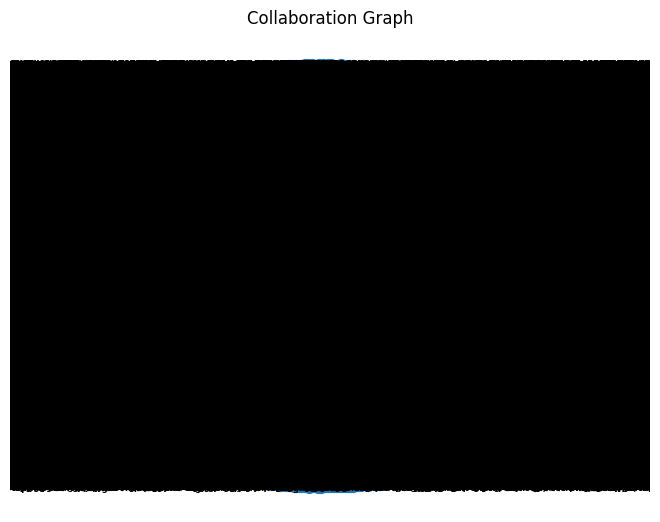

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

#Assuming you have already created the collaboration_graph with weighted edges

#Extracting edge weights
edge_weights = nx.get_edge_attributes(collaboration_graph, 'weight')

#Plotting the graph
pos = nx.spring_layout(collaboration_graph)  # You can use a different layout if needed
nx.draw(collaboration_graph, pos, with_labels=True, node_size=50, font_size=6, font_color='black', font_weight='bold', arrows=True)

#Adding edge labels with weights
nx.draw_networkx_edge_labels(collaboration_graph, pos, edge_labels=edge_weights, font_color='red')

#Display the plot
plt.title("Collaboration Graph")
plt.show()